## Analyzing Spinal Vertebrae Positions to Predict Back Pain


In [273]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import os
import statsmodels.api as sm

In [170]:
#Reading in our dataset
path = '/Users/Henry/Downloads/Dataset_spine.csv' 

df = pd.read_csv(path)

df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [171]:
#Get dummy variables for Class_att, normal vs abnormal
df_dummies = pd.get_dummies(df['Class_att'])

df_dummies.head()

,Abnormal,Normal
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [172]:
#Add the dummy variable columns

df = pd.concat([df, df_dummies], axis=1)

df.head()


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att,Abnormal,Normal
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,1,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,1,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,1,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,1,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,1,0


In [173]:
#Drop Class_att and Normal columns

df = df.drop(['Normal', 'Class_att'], axis=1)

df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Abnormal
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,1


#### Describe: View Averages, Stds, Quartile Info for each Variable

In [174]:
df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Abnormal
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981,0.677419
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558,0.468220
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900,0.000000
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075,0.000000
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950,1.000000
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600,1.000000
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200,1.000000


#### Corr: See at a glance which variables are the strongest predictors of Abnormal Spine.

In [175]:
df.corr()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Abnormal
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.043290,-0.078411,-0.089740,0.016750,0.019240,-0.007251,0.353336
pelvic_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.008852,-0.072119,-0.063394,0.028931,0.032859,-0.056550,0.326063
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054,0.312484
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853,0.210602
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145,-0.309857
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023,0.443687
pelvic_slope,0.043290,0.008852,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893,0.055865
direct_tilt,-0.078411,-0.072119,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021,-0.039591
thoracic_slope,-0.089740,-0.063394,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541,-0.049354
cervical_tilt,0.016750,0.028931,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243,0.100044


So the strongest correlations for abnormal spine are pelvic incidence, pelvic tilt, lumbar lordosis, degree spondylolisthesis.

But notably, none are high enough to predict abnormal spine on their own. So we will need to look at a combination of variables.

#### Violin Plots: Comparing Independent to Dependent Variables

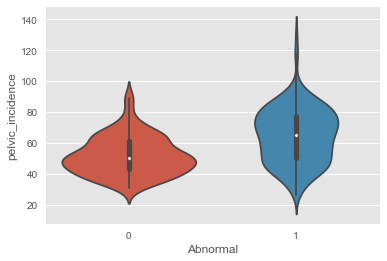

In [192]:
sns.violinplot(x='Abnormal', y='pelvic_incidence', data=df);

Pelvic incidence over 100 is a predictor of abnormality.

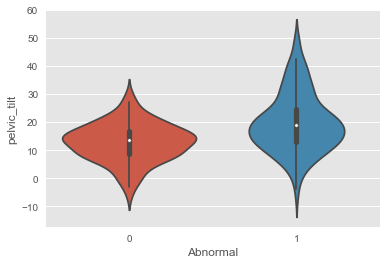

In [193]:
sns.violinplot(x='Abnormal', y='pelvic_tilt', data=df);

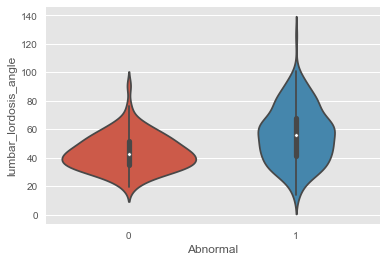

In [194]:
sns.violinplot(x='Abnormal', y='lumbar_lordosis_angle', data=df);

"Normal" lumbar lordosis angle is around 40. Abnormal spines are more evenly distributed.

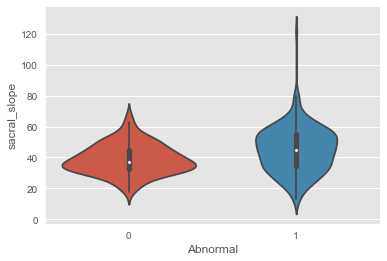

In [195]:
sns.violinplot(x='Abnormal', y='sacral_slope', data=df);

Looks like having a sacral slope larger than 50 is likely to correllate with abnormal spine (pain)

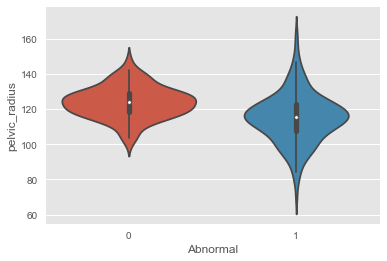

In [196]:
sns.violinplot(x='Abnormal', y='pelvic_radius', data=df);

Pelvic radius under 100 or over 140 is likely abnormal spine.

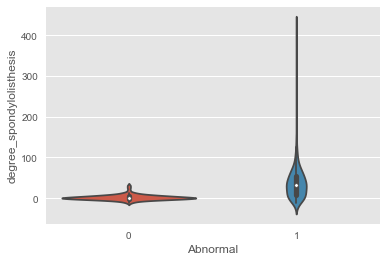

In [199]:
sns.violinplot(x='Abnormal', y='degree_spondylolisthesis', data=df);

Any degree of spondylolisthesis is likely an abnormal spine. The normal group is all near zero.

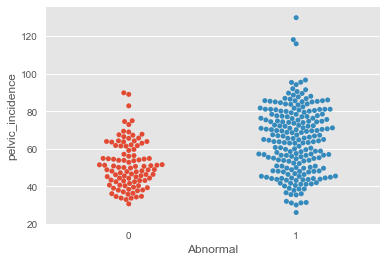

In [183]:
sns.swarmplot(x='Abnormal', y='pelvic_incidence', data=df)

Looks like normal spines tend to reside within 30-70, anything above 80 is likely to be abnormal.

#### The relationship between two Dependent Variables

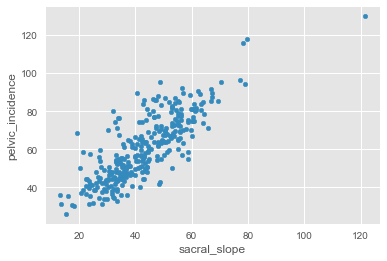

In [185]:
sacral_slope_vs_pelvic_incidence = df.plot.scatter(x='sacral_slope', y='pelvic_incidence')

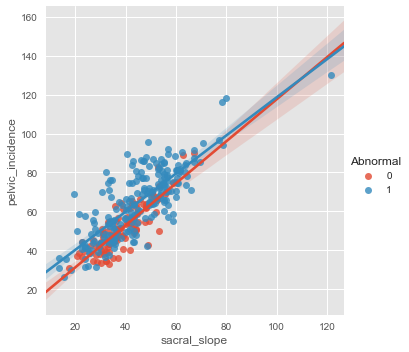

In [186]:
sns.lmplot(x='sacral_slope', y='pelvic_incidence', hue='Abnormal', data=df)

So, high correllation here means if your pelvis is aligned poorly with your femurs (irregular pelvic incidence), your sacrum (lowest part of your back) is likely to jut out as well.

This can cause strain throughout your spine by putting too much weight on it, rather than your legs.

## Setting Up Training and Testing Data

In [208]:
training_data = df.drop('Abnormal', axis=1)

training_data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171


In [213]:
testing_data = df['Abnormal']

## Logistic Regression Model

In [285]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [228]:
X_train, X_test, y_train, y_test = train_test_split(training_data, testing_data, test_size=.33, random_state=22)



In [229]:
estimators = [('clf', LogisticRegression())]

pl = Pipeline(estimators)

pl.fit(X_train, y_train)

accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data", accuracy)

('\nAccuracy on sample data', 0.87378640776699024)


In [230]:
ypred = pl.predict(X_test)

pl.score(X_test, y_test)

0.87378640776699024

In [231]:
pl.predict(X_test)
pl.score(X_test, y_test)

0.87378640776699024

In [232]:
report = classification_report(y_test, ypred)
print(report)

             precision    recall  f1-score   support

          0       0.81      0.83      0.82        36
          1       0.91      0.90      0.90        67

avg / total       0.87      0.87      0.87       103



87% Accuracy. Now let's try a decision tree to see if it does a better job.

## Decision Tree Model

Let's try a decision tree in addition to the logistic regression.

In [348]:
dt_df = df

dt_train = dt_df.drop('Abnormal', axis=1)

dt_test = dt_df['Abnormal']

dt_train.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171


In [356]:
#Set up the training and testing sets
X_train_dt, X_test_dt, Y_train_dt, Y_test_dt = train_test_split(dt_train, dt_test, test_size=0.15, random_state=2)

In [357]:
#Build our decision tree
spinal_tree = tree.DecisionTreeClassifier(min_samples_leaf=10, max_depth=5)
spinal_tree.fit(X_train_dt, Y_train_dt)
accuracy = clf_tree.score(X_test_dt, Y_test_dt)
print(accuracy)

0.872340425532


In [358]:
with open ("tree1.dot",'w') as f:
    tree.export_graphviz(clf_tree, 
                         out_file="my_tree.dot",
                         feature_names = X_train_final.columns,
                         class_names = "Abnormal")